## REST API

In [3]:
import requests

# We start by accessing the url utilizing the request function
url = "https://api.nobelprize.org/2.1/nobelPrizes"
parameters = {"nobelPrizeCategory": "phy", "format": "json"}
response = requests.get(url, params=parameters)

# retrieve data
data = response.json()
#print(data)


In [6]:
from wordcloud import STOPWORDS
# initialze empty array
motivations = []

# if data is available 
if data:
    # get nobelPrize if available, return empty array otherwise
    for prize in data.get("nobelPrizes", []):
         # get laureate ('prize taker') if available, return empty array otherwise
        for laureate in prize.get("laureates", []):
            # if motivation is stored, retrieve it
            motivation = laureate.get("motivation", {}).values()  
            motivations.extend(motivation)  

# merge all motivations to one string
all_motivations = " ".join(motivations)


# set stopwords to ignore
stopwords = {'och', 'ett', 'att', 'såsom', 'genom', 'sina', 'av', 'på', 'en', 'som','för','den',
'ge','om','hos','över','alla','de','han','hans','därmed','deras',''}
# remove all stopwords default in english and our list with swedish words
stopwords2 = set(STOPWORDS).union(stopwords)

# split words into strings, remove the ones in the stopwords set and merge the rest
motivations2 = " ".join(
    word for word in all_motivations.split() if word.lower() not in stopwords2
)

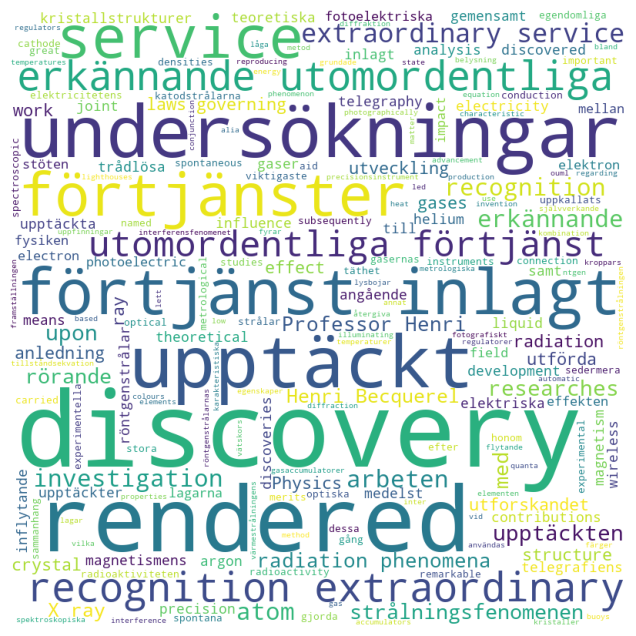

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(motivations2)

# plot results
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Web Scraping

#### Now I will scrape data from 'books.toscrape.com', investigate the url and retrieve data on 60 data points 

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# url for three pages
#https://books.toscrape.com/catalogue/page-1,2,3.html

# Column names
columns = ["upc","title", "price", "rating"]
# initilize variable 
data = []

# Loop through the first 3 pages
for page in range(1, 4):
    # retrieve and parse 
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Books found under class product_pod
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        # retrieve title, price and rating:
        # title in h3 under a
        title = book.h3.a["title"] 
        # price found in class price_color under p
        price = book.find("p", class_="price_color").text.strip() 
        # rating found in the same line as star-rating under p
        rating_class = book.find("p", class_="star-rating")["class"]
        
        # upc cannot be found under article, instead we need to acess the detail_link 
        # via product_pod that links to href
        # link and parse 
        detail_link = "https://books.toscrape.com/catalogue/" + book.h3.a["href"]
        detail_response = requests.get(detail_link)
        detail_soup = BeautifulSoup(detail_response.content, "html.parser")
        
        # upc found under class called table table-striped inside tr
        table = detail_soup.find("table", class_="table table-striped")
        upc = table.find("tr").td.text
        # retrieve relevant data
        data.append([upc, title, price, rating_class[1]])

# Convert to dataframe
data_e = pd.DataFrame(data, columns=columns)

# filter by desired titles
data_f = data_e[data_e["title"].isin(['A Light in the Attic', 'Tipping the Velvet',
        'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind'])]

print(data_f)
#data_e.head(10)

                upc                                  title   price rating
0  a897fe39b1053632                   A Light in the Attic  £51.77  Three
1  90fa61229261140a                     Tipping the Velvet  £53.74    One
2  6957f44c3847a760                             Soumission  £50.10    One
3  e00eb4fd7b871a48                          Sharp Objects  £47.82   Four
4  4165285e1663650f  Sapiens: A Brief History of Humankind  £54.23   Five
